# TeamJL_1 - Regression Project

### Project Title: The impact of agricultural activities on CO2 emissions and climate change
#### Done By: Kholofelo Mashile, Tsakane Shibila, Godfrey Tumwine, Elias Maponga, Funani Mlambo, Ishtiaque Mohammed

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

In [53]:
#load dataset from github
url = "https://raw.githubusercontent.com/kholofelon/TeamJL_1_Regression_Project/Tsakane-Shibila/co2_emissions_from_agri.csv"
data = pd.read_csv(url)

print(data.head())

          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...       

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

In [62]:

# Check the column names
print(data.columns)

# Example country-to-continent mapping
country_to_continent = {
    'United States': 'North America',
    'Canada': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'France': 'Europe',
    'Germany': 'Europe',
    'China': 'Asia',
    'India': 'Asia',
    'South Africa': 'Africa',
    'Zambia '     : 'Africa',
    'Zimbabwe'    : 'Africa',
    'Nigeria': 'Africa',
    'Afghanistan': 'Asia',
    'Western Sahara': 'Africa',
    'Yemen': 'Asia',
    'Yugoslav SFR ': 'Europe',
    # Add more countries as needed
}

# Assuming the correct column name is 'AREA'
data['continent'] = data['Area'].map(country_to_continent)

# Handle missing continent labels (optional)
data['continent'] = data['continent'].fillna('Unknown')

# Preview the updated DataFrame
print(data[['Area', 'continent']].head())


Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature °C',
       'continent'],
      dtype='object')
          Area continent
0  Afghanistan      Asia
1  Afghanistan      Asia
2  Afghanistan      Asia
3  Afghanistan      Asia
4  Afghanistan      Asia


In [60]:
# Filter rows where 'continent' is NaN
unknown_continent = data_cleaned[data_cleaned['continent'].isna()]

# Display the rows with unknown continent
print("Countries with Unknown Continent:")
print(unknown_continent[['area', 'continent']])


Countries with Unknown Continent:
Empty DataFrame
Columns: [area, continent]
Index: []


In [63]:
# Count occurrences of each area by continent
area_continent_counts = data_cleaned.groupby(['continent', 'area']).size().reset_index(name='counts')

# Display the result
print("Counts of Areas by Continent:")
print(area_continent_counts)


Counts of Areas by Continent:
    continent            area  counts
0      Africa         Nigeria      31
1      Africa    South Africa      31
2        Asia     Afghanistan      31
3        Asia           China      31
4        Asia           India      31
..        ...             ...     ...
231   Unknown  Western Sahara      31
232   Unknown           Yemen      31
233   Unknown    Yugoslav SFR       2
234   Unknown          Zambia      31
235   Unknown        Zimbabwe      31

[236 rows x 3 columns]


In [67]:
#  Standardize column names: lowercase and replace spaces with underscores
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]
print(data.columns)  # Check if columns are renamed properly

Index(['area', 'year', 'savanna_fires', 'forest_fires', 'crop_residues',
       'rice_cultivation', 'drained_organic_soils_(co2)',
       'pesticides_manufacturing', 'food_transport', 'forestland',
       'net_forest_conversion', 'food_household_consumption', 'food_retail',
       'on-farm_electricity_use', 'food_packaging',
       'agrifood_systems_waste_disposal', 'food_processing',
       'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
       'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils',
       'fires_in_humid_tropical_forests', 'on-farm_energy_use',
       'rural_population', 'urban_population', 'total_population_-_male',
       'total_population_-_female', 'total_emission', 'average_temperature_°c',
       'continent'],
      dtype='object')


In [68]:
# Check if required columns are present
required_columns = ['year', 'total_emission', 'average_temperature_°c', 'area']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"\nMissing Columns: {missing_columns}")
    # Depending on the context, you might want to handle this differently
    # For example, you could exit the script or proceed with available columns
else:
    print("\nAll required columns are present.")

    # Proceed with cleaning
    # Handle missing values
    missing_values = data.isnull().sum()
    print("\nMissing Values:")
    print(missing_values)


All required columns are present.

Missing Values:
area                                  0
year                                  0
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
rice_cultivation                      0
drained_organic_soils_(co2)           0
pesticides_manufacturing              0
food_transport                        0
forestland                          493
net_forest_conversion               493
food_household_consumption          473
food_retail                           0
on-farm_electricity_use               0
food_packaging                        0
agrifood_systems_waste_disposal       0
food_processing                       0
fertilizers_manufacturing             0
ippu                                743
manure_applied_to_soils             928
manure_left_on_pasture                0
manure_management                   928
fires_in_organic_soils                0
fires_in_humid_tropical_fore

In [69]:

# View the first few rows
print(data.head())

# View summary statistics for numerical columns
print(data.describe())

# Check the data types and missing values
print(data.info())


          area  year  savanna_fires  forest_fires  crop_residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   rice_cultivation  drained_organic_soils_(co2)  pesticides_manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   food_transport  forestland  ...  fires_in_organic_soils  \
0         63.1152   -2388.803  ...                     0.0  

In [70]:
  # Option 1: Drop rows with any missing values
# df_cleaned = df.dropna()

# Option 2: Impute missing values
# For simplicity, we'll drop missing values here
data_cleaned = data.dropna()

# Check for duplicates
duplicate_rows = data_cleaned.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_rows}")

# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Ensure numerical columns are correctly typed
data_cleaned['year'] = pd.to_numeric(data_cleaned['year'], errors='coerce')
data_cleaned['total_emission'] = pd.to_numeric(data_cleaned['total_emission'], errors='coerce')
data_cleaned['average_temperature_°c'] = pd.to_numeric(data_cleaned['average_temperature_°c'], errors='coerce')

# After conversion, drop any rows with NaNs introduced by coercion
data_cleaned = data_cleaned.dropna(subset=['year', 'total_emission', 'average_temperature_°c'])



Duplicate Rows: 0


In [71]:
# Checking for missing values
print(data.isnull().sum())

# Handling missing values
# Option 1: Remove rows with missing values
data_cleaned = data.dropna()

# Option 3: Forward-fill or backward-fill missing values
data.ffill(inplace=True)  # forward fill
data.bfill(inplace=True)  # backward fill


area                                  0
year                                  0
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
rice_cultivation                      0
drained_organic_soils_(co2)           0
pesticides_manufacturing              0
food_transport                        0
forestland                          493
net_forest_conversion               493
food_household_consumption          473
food_retail                           0
on-farm_electricity_use               0
food_packaging                        0
agrifood_systems_waste_disposal       0
food_processing                       0
fertilizers_manufacturing             0
ippu                                743
manure_applied_to_soils             928
manure_left_on_pasture                0
manure_management                   928
fires_in_organic_soils                0
fires_in_humid_tropical_forests     155
on-farm_energy_use                  956


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

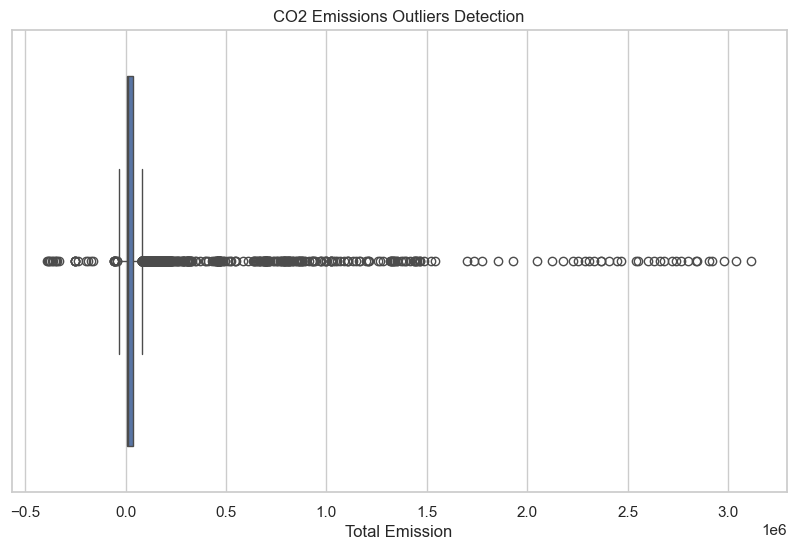

In [40]:
# Check for outliers using boxplots 
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_emission', data=data_cleaned)
plt.title("CO2 Emissions Outliers Detection")
plt.xlabel("Total Emission")
plt.show()

In [42]:
# Exploratory Data Analysis (EDA)
print("\nSummary Statistics:")
print(data_cleaned.describe())


Summary Statistics:
              year  savanna_fires  forest_fires  crop_residues  \
count  6965.000000    6965.000000   6965.000000    6965.000000   
mean   2005.124910    1183.107146    907.027206    1046.497444   
std       8.894665    5235.194454   3696.662005    3832.602998   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000       7.433500   
50%    2005.000000       1.587000      0.416400     102.982000   
75%    2013.000000     108.361700     61.237200     355.159700   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       rice_cultivation  drained_organic_soils_(co2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.00

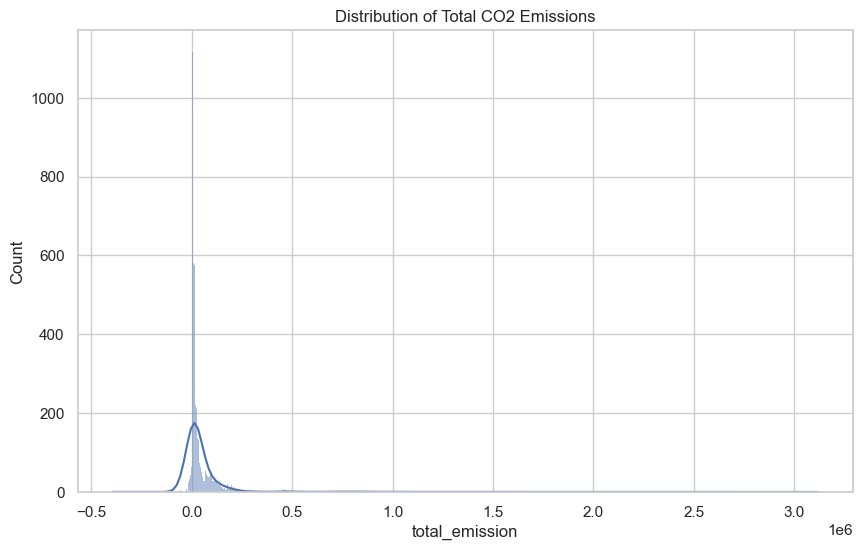

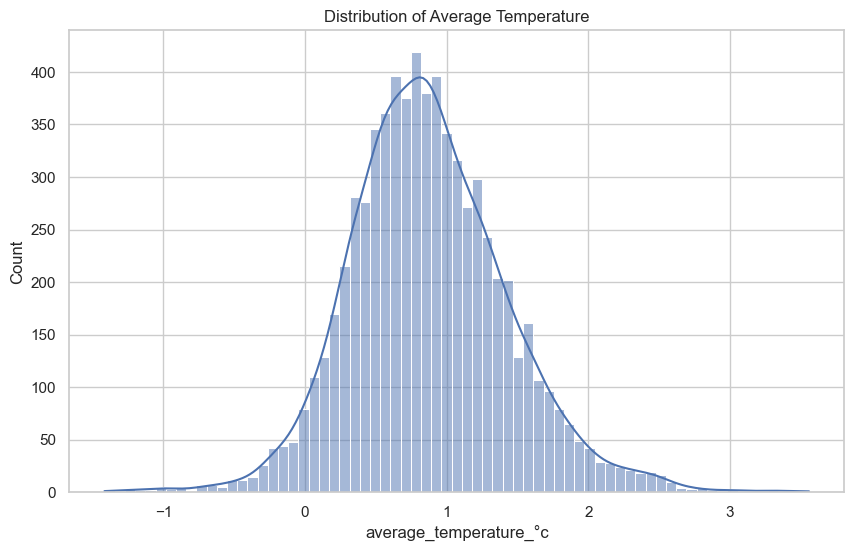

In [43]:
#Use Histograms to understand the distribution of numerical features.

# Histogram with KDE for total emissions
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['total_emission'], kde=True)
plt.title("Distribution of Total CO2 Emissions")
plt.show()

# Histogram with KDE for average temperature
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['average_temperature_°c'], kde=True)
plt.title("Distribution of Average Temperature")
plt.show()


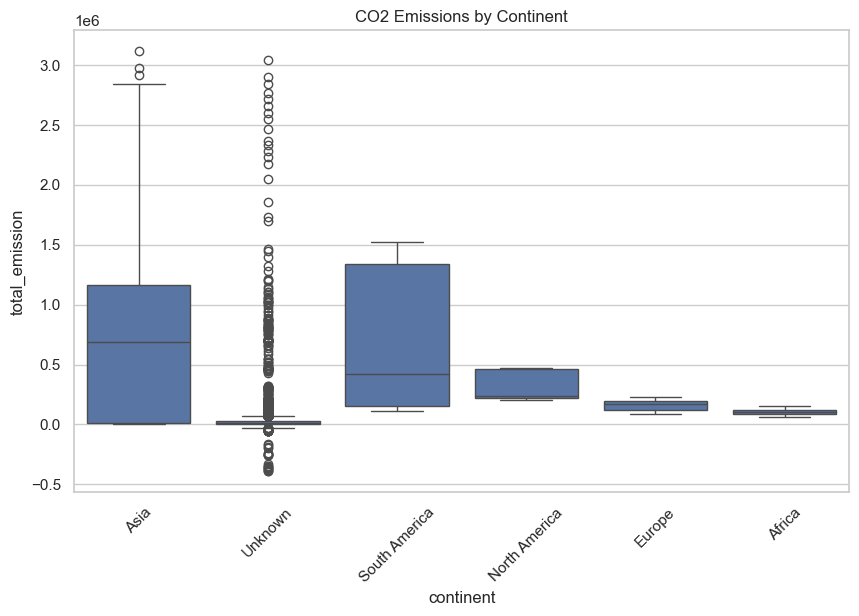

In [47]:
# Box plot for a specific numerical column, e.g., 'co2_emissions'
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='total_emission', data=data)
plt.title('CO2 Emissions by Continent')
plt.xticks(rotation=45)
plt.show()


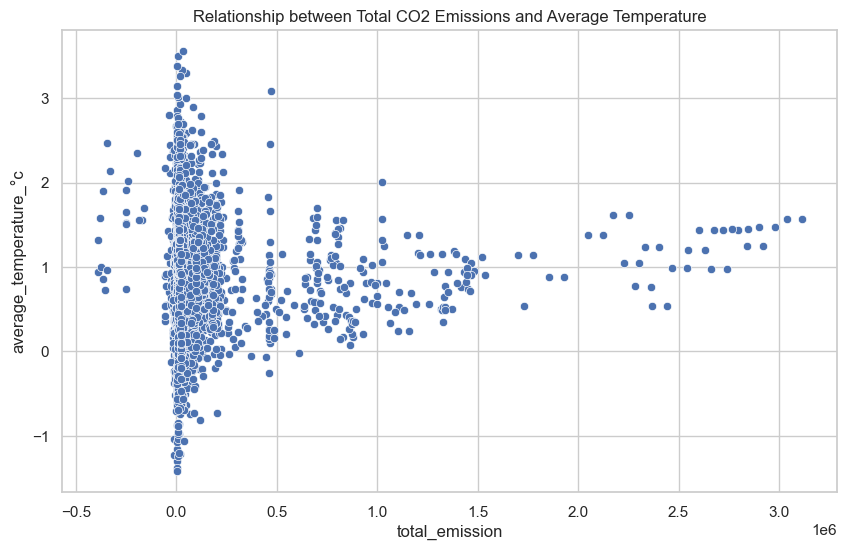

In [44]:
# Scatter plot of emissions vs. temperature
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_emission', y='average_temperature_°c', data=data_cleaned)
plt.title("Relationship between Total CO2 Emissions and Average Temperature")
plt.show()

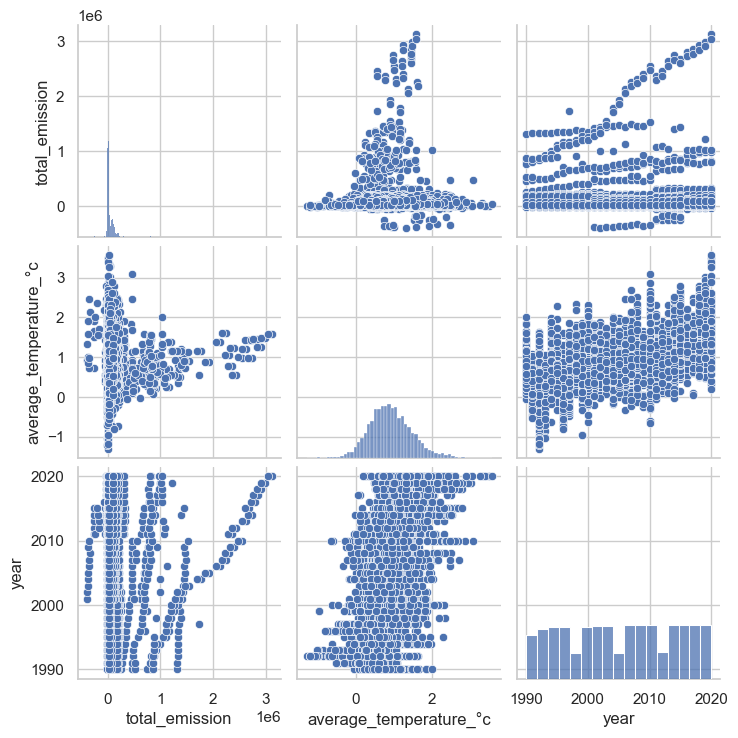

In [74]:
# Pair plot of key variables
sns.pairplot(data_cleaned[['total_emission', 'average_temperature_°c', 'year']])
plt.show()

C:\Users\tsaka\AppData\Local\Temp\ipykernel_16284\1364426903.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='continent', y='total_emission', data=data_cleaned, estimator=sum, ci=None)


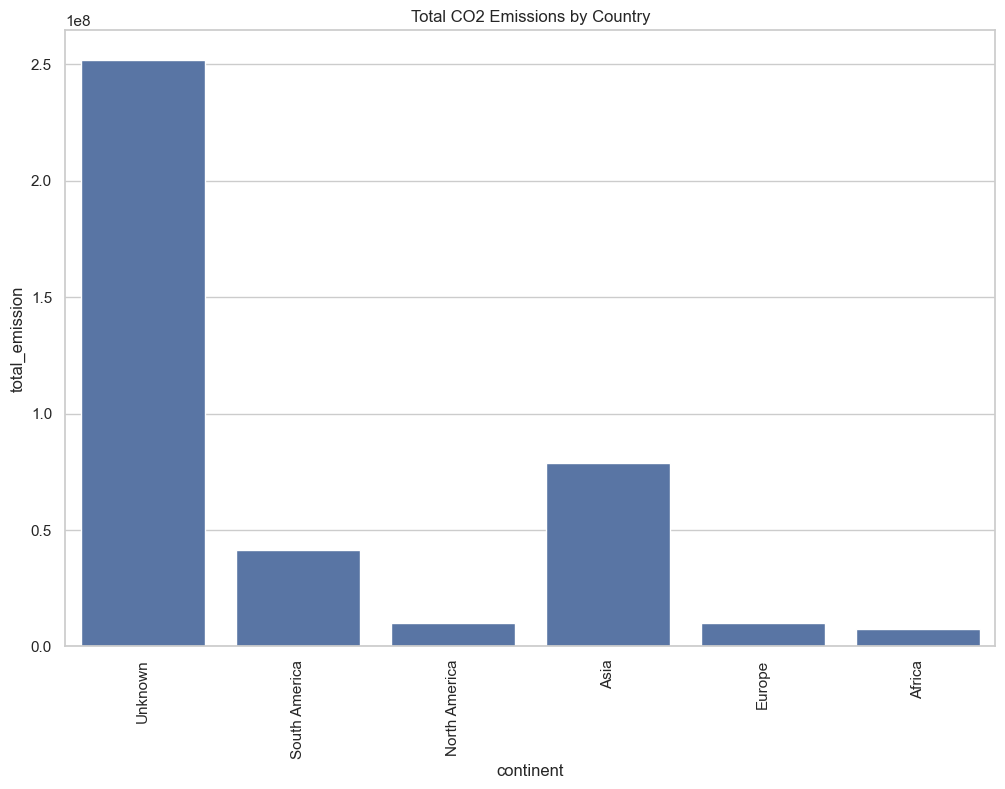

In [75]:
# Bar plot for CO2 emissions by country
plt.figure(figsize=(12,8))
sns.barplot(x='continent', y='total_emission', data=data_cleaned, estimator=sum, ci=None)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Total CO2 Emissions by Country")
plt.show()

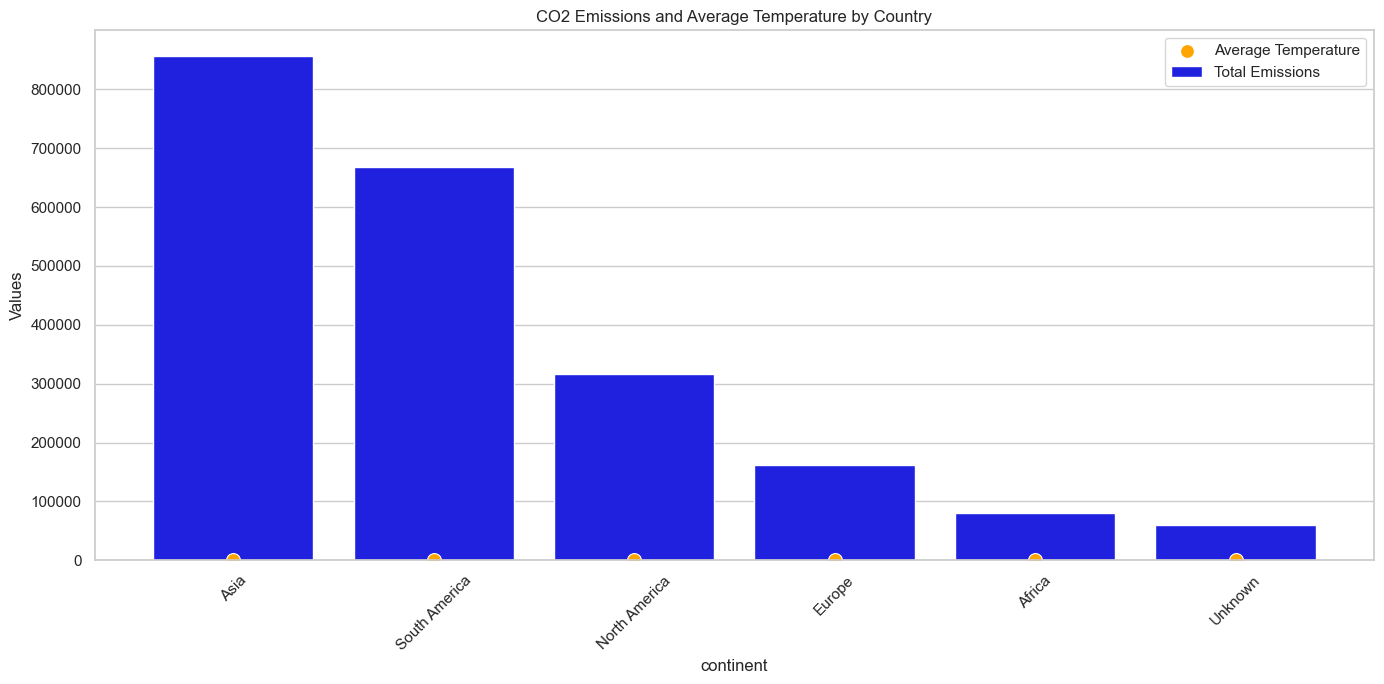

In [77]:

# Assuming your DataFrame is named data_cleaned
# Ensure 'total_emission' and 'average_temperature_°c' are numeric

# Step 1: Aggregate total emissions by country and average temperature
emission_temp = data_cleaned.groupby(['continent'])[['total_emission', 'average_temperature_°c']].mean().reset_index()

# Step 2: Sort values for better visualization
emission_temp = emission_temp.sort_values(by='total_emission', ascending=False)

# Step 3: Create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(data=emission_temp, x='continent', y='total_emission', color='blue', label='Total Emissions')
sns.scatterplot(data=emission_temp, x='continent', y='average_temperature_°c', color='orange', label='Average Temperature', s=100)

# Customize plot
plt.title("CO2 Emissions and Average Temperature by Country")
plt.xlabel("continent")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


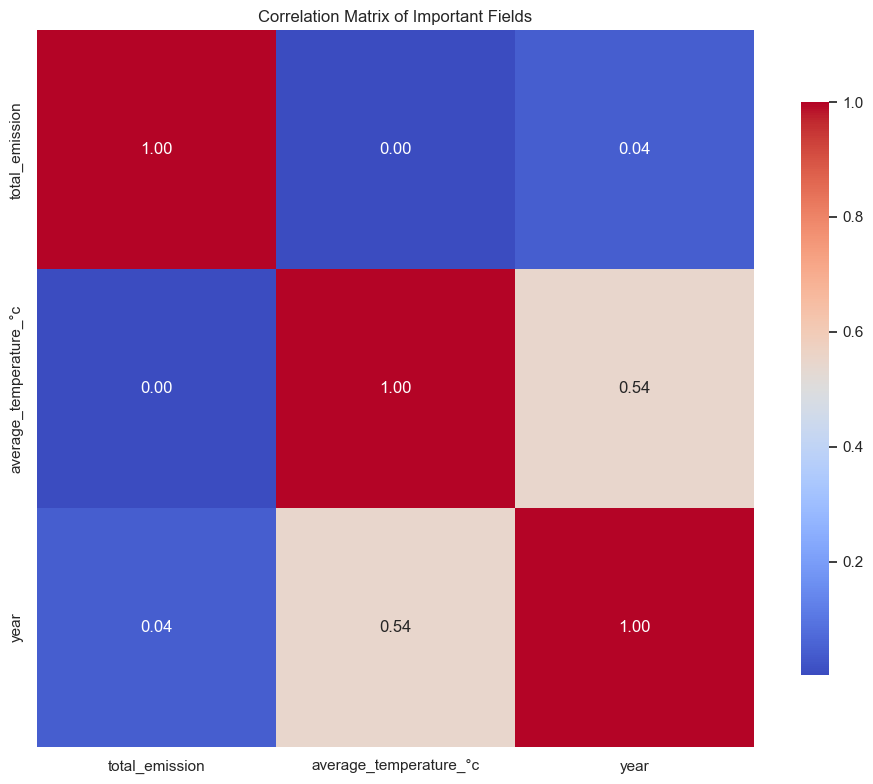

In [78]:

# Assuming your DataFrame is named data_cleaned
# Step 1: Select relevant numerical fields
# Adjust the columns as per your DataFrame
numerical_fields = data_cleaned[['total_emission', 'average_temperature_°c', 'year']]  # Add more fields if needed

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_fields.corr()

# Step 3: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Important Fields")
plt.tight_layout()
plt.show()


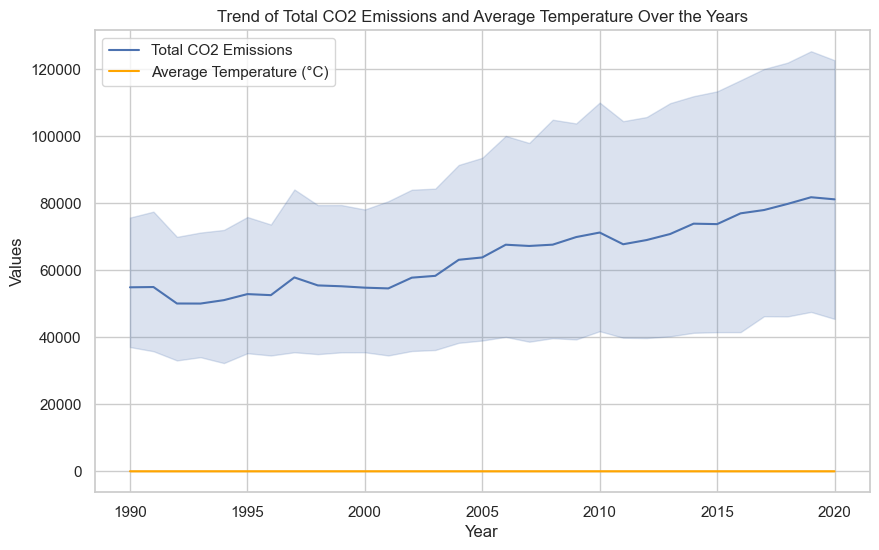

In [45]:
# Plotting total emissions and average temperature on the same plot
plt.figure(figsize=(10,6))

# Plot for total CO2 emissions
sns.lineplot(x='year', y='total_emission', data=data_cleaned, label='Total CO2 Emissions')

# Plot for average temperature
sns.lineplot(x='year', y='average_temperature_°c', data=data_cleaned, label='Average Temperature (°C)', color='orange')

# Add title and labels
plt.title("Trend of Total CO2 Emissions and Average Temperature Over the Years")
plt.xlabel("Year")
plt.ylabel("Values")

# Display the legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

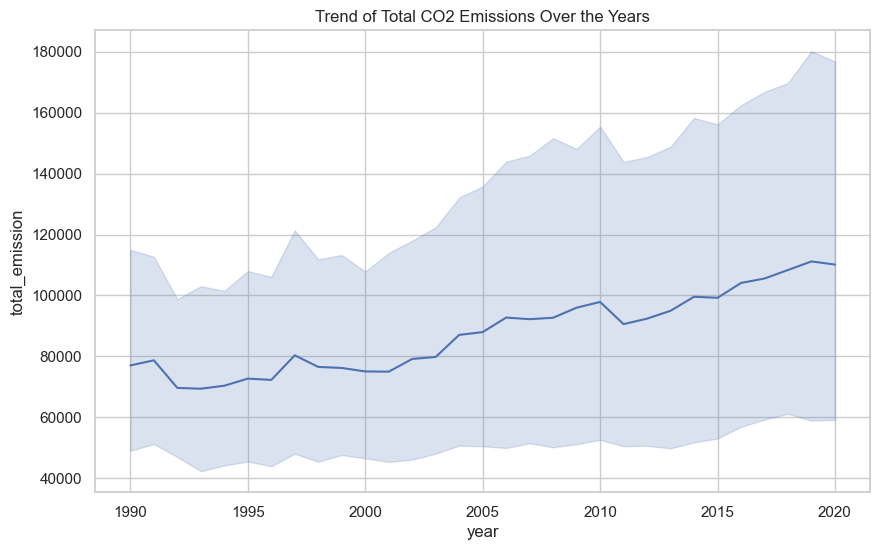

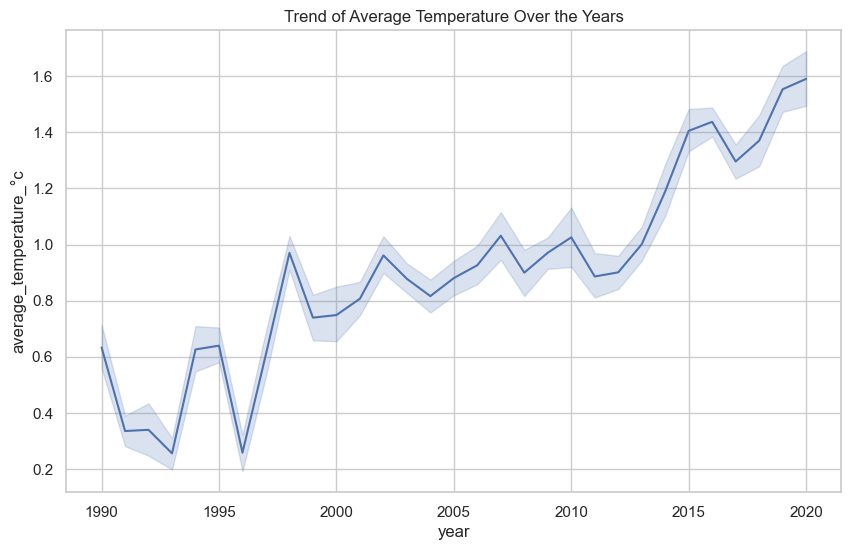

In [72]:
# Trend of total emissions over the years
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='total_emission', data=data_cleaned)
plt.title("Trend of Total CO2 Emissions Over the Years")
plt.show()

# Trend of average temperature over the years
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='average_temperature_°c', data=data_cleaned)
plt.title("Trend of Average Temperature Over the Years")
plt.show()

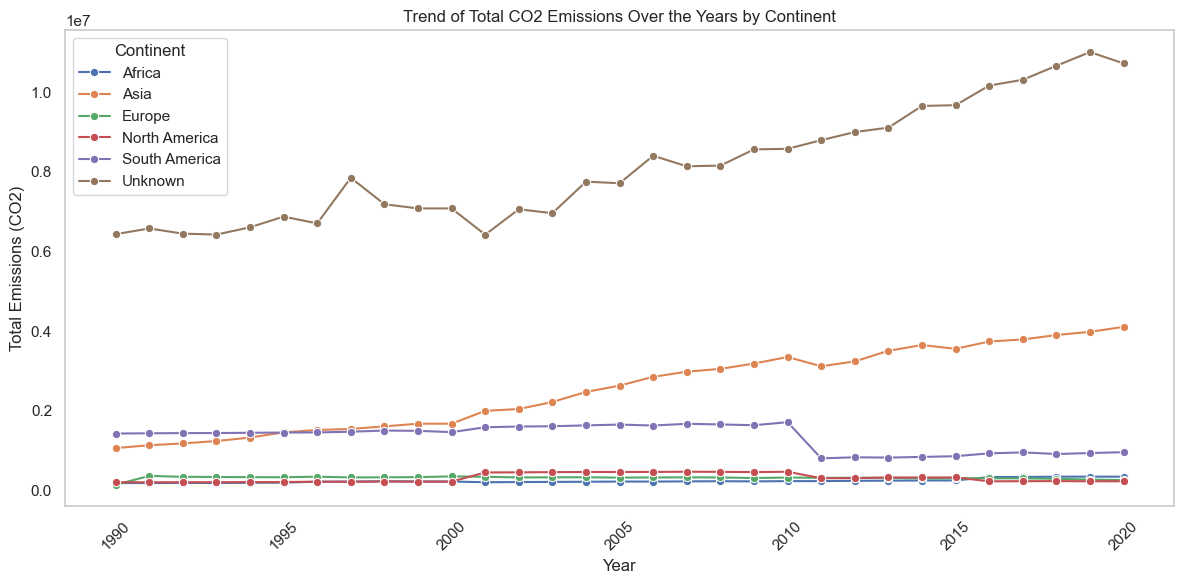

In [73]:

# Assuming your DataFrame is named data_cleaned
# Ensure 'year' and 'total_emission' are numeric, and 'continent' is properly assigned

# Step 1: Aggregate total emissions by year and continent
emission_trends = data_cleaned.groupby(['year', 'continent'])['total_emission'].sum().reset_index()

# Step 2: Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=emission_trends, x='year', y='total_emission', hue='continent', marker='o')
plt.title("Trend of Total CO2 Emissions Over the Years by Continent")
plt.xlabel("Year")
plt.ylabel("Total Emissions (CO2)")
plt.legend(title='Continent')
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
